In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [82]:
X,y=make_moons(n_samples=250, noise=0.5)

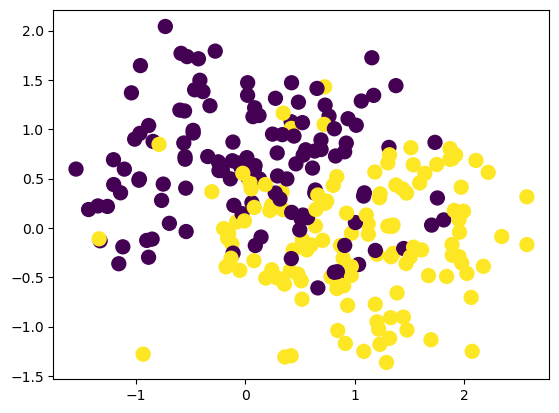

In [83]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [84]:
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().unsqueeze(1) # shape [250,1]


In [85]:
dataset = TensorDataset(X_tensor,y_tensor)
dataloader = DataLoader(dataset,batch_size=32,shuffle=True)

In [86]:
class DeepSigmoidNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(2, 10)
        self.fc2=nn.Linear(10,10)
        self.fc3=nn.Linear(10,10)
        self.fc4=nn.Linear(10,10)
        self.fc5=nn.Linear(10,10)
        self.fc6=nn.Linear(10,10)
        self.fc7=nn.Linear(10,10) 
        self.fc8=nn.Linear(10,10)
        self.fc4=nn.Linear(10,10)
        self.fc5=nn.Linear(10,10)
        self.output=nn.Linear(10,1)
        
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.activation(self.fc4(x))
        x = self.activation(self.fc5(x))
        x = self.activation(self.fc6(x))
        x = self.activation(self.fc7(x))
        x = self.activation(self.fc8(x))
        x = self.activation(self.fc4(x))
        x = self.activation(self.fc5(x))
        x = torch.sigmoid(self.output(x))  # Final output for binary classification
        return x
        

In [87]:
model = DeepSigmoidNN()
loss_fun= nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [88]:
old_weight = model.fc1.weight.clone().detach()
old_weight

tensor([[ 0.5512, -0.4860],
        [-0.3068,  0.4921],
        [ 0.2629,  0.0727],
        [ 0.1518, -0.1199],
        [-0.3102,  0.6705],
        [-0.0173, -0.1964],
        [ 0.3470, -0.6767],
        [-0.1300,  0.6236],
        [-0.0079,  0.2717],
        [ 0.5586,  0.4313]])

In [89]:
def compute_accuracy(preds, labels):
    preds = (preds > 0.5).float()
    correct = (preds == labels).sum().item()
    return correct/labels.size(0)

In [90]:
epochs=10
for epoch in range(epochs):
    total_loss = 0
    total_acc =0
    
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs =model(batch_X)
        loss = loss_fun(outputs, batch_y)
        loss.backward()
        print("Grad of fc1:", model.fc1.weight.grad.norm().item())
        optimizer.step()
        
        total_loss += loss.item()
        total_acc += compute_accuracy(outputs, batch_y)
        
    avg_loss = total_loss/ len(dataloader)
    avg_acc = total_acc / len(dataloader)
    
    print(f"Epoch: {epoch+1}/{epochs} | Loss: {avg_loss:.4f} | Accuracy: {avg_acc:.4f}")
    
        

Grad of fc1: 1.005064920178711e-10
Grad of fc1: 3.2225083712589253e-10
Grad of fc1: 1.6297999061443136e-10
Grad of fc1: 1.5523807239681275e-10
Grad of fc1: 2.8045918365471323e-10
Grad of fc1: 1.9570467468810193e-10
Grad of fc1: 2.770968177134847e-10
Grad of fc1: 2.3126729697953152e-10
Epoch: 1/10 | Loss: 0.6952 | Accuracy: 0.5009
Grad of fc1: 1.9016828389784024e-10
Grad of fc1: 1.2282785899486726e-10
Grad of fc1: 2.415746491735149e-10
Grad of fc1: 1.981056430011563e-10
Grad of fc1: 2.2521468023839475e-10
Grad of fc1: 1.9966371611612743e-10
Grad of fc1: 2.0130216937808143e-10
Grad of fc1: 2.295096196425206e-10
Epoch: 2/10 | Loss: 0.6945 | Accuracy: 0.4991
Grad of fc1: 1.7002090013651383e-10
Grad of fc1: 1.8305688909148188e-10
Grad of fc1: 2.210584076900446e-10
Grad of fc1: 1.823352163698999e-10
Grad of fc1: 2.301143303684583e-10
Grad of fc1: 2.2844033609192849e-10
Grad of fc1: 1.9749857305129126e-10
Grad of fc1: 1.6969209370998328e-10
Epoch: 3/10 | Loss: 0.6940 | Accuracy: 0.4982
Grad o

In [91]:
new_weight = model.fc1.weight.clone().detach() 

In [92]:
new_weight

tensor([[ 0.5511, -0.4859],
        [-0.3066,  0.4919],
        [ 0.2624,  0.0730],
        [ 0.1514, -0.1196],
        [-0.3102,  0.6705],
        [-0.0179, -0.1959],
        [ 0.3469, -0.6767],
        [-0.1301,  0.6236],
        [-0.0072,  0.2712],
        [ 0.5589,  0.4311]])

In [93]:
old_weight

tensor([[ 0.5512, -0.4860],
        [-0.3068,  0.4921],
        [ 0.2629,  0.0727],
        [ 0.1518, -0.1199],
        [-0.3102,  0.6705],
        [-0.0173, -0.1964],
        [ 0.3470, -0.6767],
        [-0.1300,  0.6236],
        [-0.0079,  0.2717],
        [ 0.5586,  0.4313]])

In [94]:
# calculating new grads 

gradient_dl_dw = (old_weight - new_weight)/0.001
percent_change = abs(100*(old_weight - new_weight)/old_weight)

In [95]:
gradient_dl_dw

tensor([[ 0.0448, -0.0476],
        [-0.2128,  0.1796],
        [ 0.4925, -0.3864],
        [ 0.4935, -0.3706],
        [-0.0065, -0.0058],
        [ 0.6472, -0.4756],
        [ 0.0927, -0.0695],
        [ 0.1076, -0.0743],
        [-0.6312,  0.5028],
        [-0.3037,  0.2610]])

In [96]:
percent_change

tensor([[8.1211e-03, 9.7879e-03],
        [6.9350e-02, 3.6494e-02],
        [1.8733e-01, 5.3190e-01],
        [3.2500e-01, 3.0900e-01],
        [2.1042e-03, 8.7115e-04],
        [3.7437e+00, 2.4218e-01],
        [2.6728e-02, 1.0270e-02],
        [8.2758e-02, 1.1910e-02],
        [8.0319e+00, 1.8504e-01],
        [5.4376e-02, 6.0508e-02]])

vgp result before reducing no of layers

In [ ]:
# gradient change =tensor([ 
#         [ 0.0448, -0.0476],
#         [-0.2128,  0.1796],
#         [ 0.4925, -0.3864],
#         [ 0.4935, -0.3706],
#         [-0.0065, -0.0058],
#         [ 0.6472, -0.4756],
#         [ 0.0927, -0.0695],
#         [ 0.1076, -0.0743],
#         [-0.6312,  0.5028],
#         [-0.3037,  0.2610]])

Results after reducing no. of layers 

In [ ]:
# percent_change = tensor([
#         [  61.1749,   19.5349],
#         [1000.1516,   14.1364],
#         [  30.6946,   18.8138],
#         [  53.6735,   31.1321],
#         [  11.3543,   75.2933],
#         [  27.9173,    9.4952],
#         [  37.3605,  144.9224],
#         [  13.7372,   48.4270],
#         [  10.9983,   18.9258],
#         [  21.6259,  160.5358]])


# gradient = tensor([
#         [ 73.8398, -73.1962],
#         [ 69.4607, -69.7715],
#         [-90.7436,  90.4319],
#         [ 67.1418, -67.2083],
#         [ 72.8164, -74.4471],
#         [ 34.5214, -32.2869],
#         [-84.6676,  84.3552],
#         [-80.5159,  80.4206],
#         [ 76.4807, -78.5643],
#         [ 70.7073, -71.7952]])